# Genlight - Artificial Intelligence

**Objetivo**:  utilizar inteligência artificial para promover a sustentabilidade energética, integrando fontes renováveis como solar e eólica. Analisar dados em tempo real e prever o desempenho energético, permitindo otimizar o uso de cada fonte. Com isso, ajudamos empresas a maximizar eficiência, reduzir custos e impulsionar práticas sustentáveis.

## Integrantes


*   Felipe Ribeiro Tardochi da Silva - 555100
*   Gustavo Dias da Silva Cruz - 556448
*   Júlia Medeiros Angelozi - 556364

### Turma: 1TDSPH

# Energia Solar
Sendo uma fonte de energia limpa, foi adotada no projeto com objetivo de ajudar empresas. Abaixo segue-se as bibliotecas externas necessárias para o EDA e criação do modelo de inteligência artificial.

In [5]:
!pip install pandas numpy tensorflow scikit-learn matplotlib seaborn

# Datasets:
Os datasets `Plant_2_Generation_Dataset.csv` e `Plant_2_Weather_Sensor_Data.csv` são para geração do modelo de energia solar e análise exploratória de features do mesmo.

As features do `Plant_2_Generation_Dataset.csv` são:

Para dados de geração

* DATE_TIME - Data e hora de cada observação. Observações registradas em intervalos de 15 minutos
* PLANT_ID - ID da usina de energia solar (comum para todo o arquivo)
* SOURCE_KEY - ID do inversor
* DC_POWER - Quantidade de entrada de energia CC para o inversor (SOURCE_KEY) no intervalo (em kW)
* AC_POWER - Quantidade de energia CA gerada pelo inversor (SOURCE_KEY) no intervalo (em kW)
* DAILY_YIELD - Soma cumulativa de energia gerada naquele dia, até aquele ponto no tempo
* TOTAL_YIELD - Rendimento total do inversor até aquele ponto no tempo

Para dados do sensor climático
* DATE_TIME - Data e hora de cada observação. Observações registradas em intervalos de 15 minutos
* PLANT_ID - ID da Usina Solar (comum para todo o arquivo)
* SOURCE_KEY - ID do painel do sensor (comum para todo o arquivo, apenas um tipo de painel do sensor para a usina)
* AMBIENT_TEMPERATURE - Temperatura ambiente na usina
* MODULE_TEMPERATURE - Leitura de temperatura para o módulo conectado ao painel do sensor
* IRRADIATION - Quantidade de irradiação para o intervalo de 15 minutos

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Agora, mesclamos os dois datasets e convertemos o campo `DATE_TIME` para datetime e ordenamos.

In [11]:
generation_data = pd.read_csv('Plant_2_Generation_Dataset.csv')
weather_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')
# Mesclar os datasets
df_solar = pd.merge(generation_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
# Converter 'DATE_TIME' para datetime e ordenar
df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])
df_solar = df_solar.sort_values('DATE_TIME')
df_solar.set_index('DATE_TIME', inplace=True)
df_solar

SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
DATE_TIME                                                               
2020-05-15 00:00:00  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
2020-05-15 00:00:00  xoJJ8DcxJEcupym       0.0       0.0     0.000000   
2020-05-15 00:00:00  xMbIugepa2P7lBB       0.0       0.0  9166.000000   
2020-05-15 00:00:00  vOuJvMaM2sgwLmb       0.0       0.0     0.000000   
2020-05-15 00:00:00  rrq4fwE8jgrTyWY       0.0       0.0   280.214286   
...                              ...       ...       ...          ...   
2020-06-17 23:45:00  81aHJ1q11NBPMrL       0.0       0.0  4306.000000   
2020-06-17 23:45:00  4UPUqMRk7TRMgml       0.0       0.0  4446.000000   
2020-06-17 23:45:00  xMbIugepa2P7lBB       0.0       0.0  4218.000000   
2020-06-17 23:45:00  PeE6FRyGXUgsRhN       0.0       0.0  4258.000000   
2020-06-17 23:45:00  xoJJ8DcxJEcupym       0.0       0.0  4316.000000   

                      TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
DATE_TIME                                                                    
2020-05-15 00:00:00  2.429011e+06            27.004764           25.060789   
2020-05-15 00:00:00  2.091436e+08            27.004764           25.060789   
2020-05-15 00:00:00  1.066566e+08            27.004764           25.060789   
2020-05-15 00:00:00  2.211962e+06            27.004764           25.060789   
2020-05-15 00:00:00  1.209641e+08            27.004764           25.060789   
...                           ...                  ...                 ...   
2020-06-17 23:45:00  1.215486e+09            23.202871           22.535908   
2020-06-17 23:45:00  2.653495e+06            23.202871           22.535908   
2020-06-17 23:45:00  1.068964e+08            23.202871           22.535908   
2020-06-17 23:45:00  1.348549e+09            23.202871           22.535908   
2020-06-17 23:45:00  2.093357e+08            23.202871           22.535908   

                     IRRADIATION  
DATE_TIME                         
2020-05-15 00:00:00          0.0  
2020-05-15 00:00:00          0.0  
2020-05-15 00:00:00          0.0  
2020-05-15 00:00:00          0.0  
2020-05-15 00:00:00          0.0  
...                          ...  
2020-06-17 23:45:00          0.0  
2020-06-17 23:45:00          0.0  
2020-06-17 23:45:00          0.0  
2020-06-17 23:45:00          0.0  
2020-06-17 23:45:00          0.0  

[67698 rows x 8 columns]

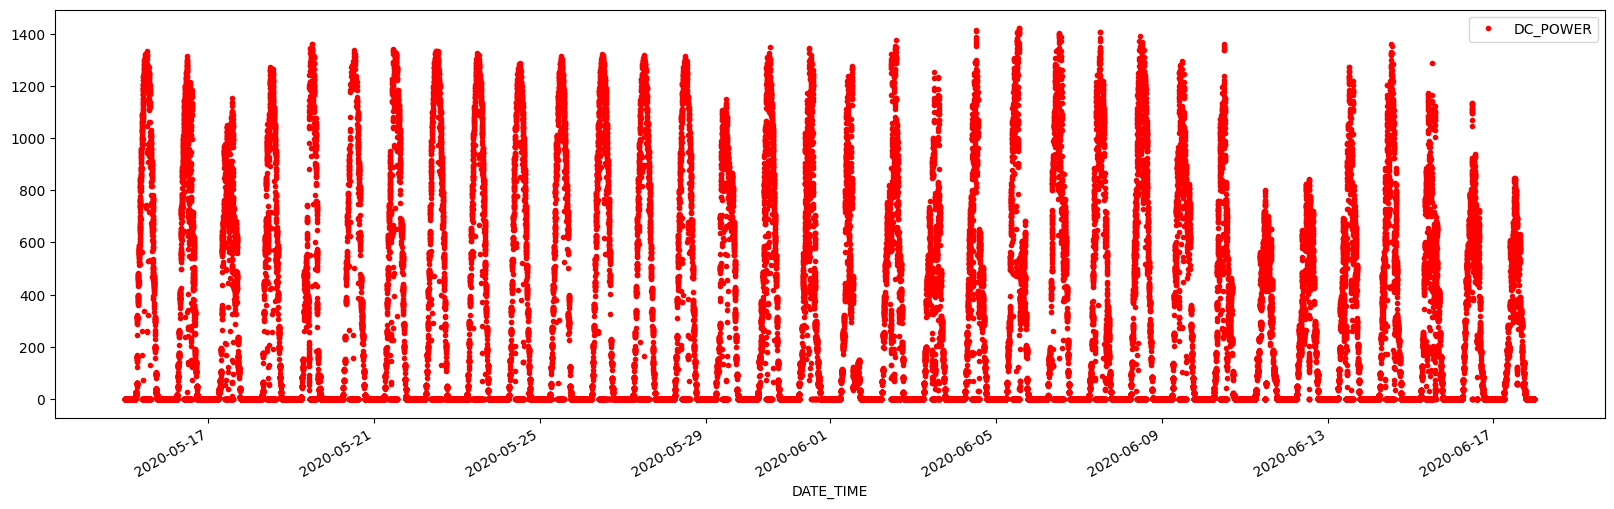

In [16]:
df_solar.plot(y='DC_POWER', style='.', figsize = (20, 6),color= "red");


Vemos acima a variação natural do tempo sobre acúmulo de energia.

In [17]:
import plotly.express as px
import plotly.graph_objs as go

fig = px.scatter(df_solar, x = 'DAILY_YIELD', y = 'IRRADIATION', log_x=True,
                 hover_name="SOURCE_KEY", hover_data=["DAILY_YIELD", "IRRADIATION"],
                color = 'DAILY_YIELD', color_continuous_scale= 'rainbow',
                title = 'Produção diária x irradiação')
fig.show()

##  Produção diária x irradiação
O nível de radiação solar direta afeta diretamente a quantidade de energia gerada, e claro, varia durante o dia.

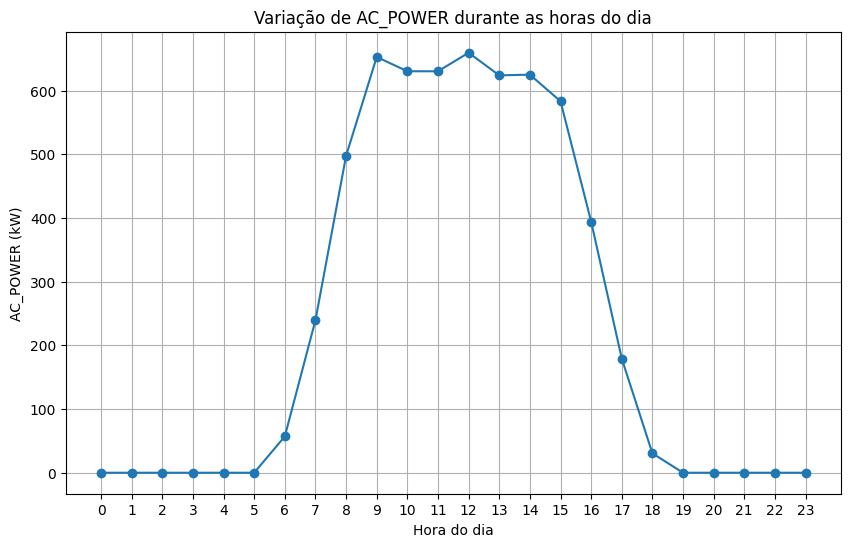

In [18]:
# Extrair a hora de cada registro
df_solar['HOUR'] = df_solar.index.hour

# Calcular a média de AC_POWER para cada hora
ac_power_variation = df_solar.groupby('HOUR')['AC_POWER'].mean()

# Plotar a variação de AC_POWER durante as horas do dia
plt.figure(figsize=(10, 6))
plt.plot(ac_power_variation.index, ac_power_variation.values, marker='o')
plt.title('Variação de AC_POWER durante as horas do dia')
plt.xlabel('Hora do dia')
plt.ylabel('AC_POWER (kW)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Afinal, o que é o AC Power?
Embora já explicado, é bom retomar! AC_POWER (do inglês Alternating Current Power) refere-se à potência elétrica em corrente alternada gerada pelo sistema. Nos sistemas de energia solar fotovoltaica, os painéis solares produzem energia em corrente contínua (DC). Essa energia é então convertida em corrente alternada (AC) por meio de um inversor, tornando-a compatível com a rede elétrica e os equipamentos eletrodomésticos.

Portanto, AC_POWER representa a quantidade de potência elétrica em corrente alternada disponível após a conversão, e é uma medida da energia efetivamente utilizável ou injetada na rede pelo sistema solar.

O gráfico acima mostra como essa potência também depende de outra variável: a hora do dia, logicamente.

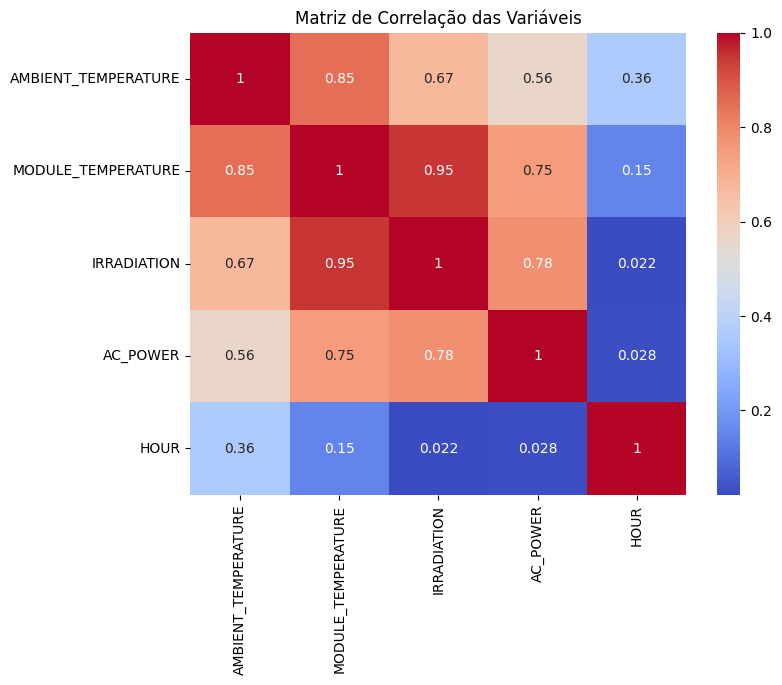

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as features relevantes
features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'AC_POWER', 'HOUR']

# Calcular a matriz de correlação
corr_matrix = df_solar[features].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis')
plt.show()

Podemos ver também com o gráfico acima algumas relações, destacando-se:

* Temperatura ambiente e temperatura do módulo
* Radiação solar e temperatura do módulo

A partir da radiação solar e temperatura, iremos prever o AC_POWER, ou seja, a potência energia fornecida pela usina solar.


# Modelo de energia solar
Agora, segue-se o código de criação do modelo:

In [28]:
# FILE: energia_solar2.py
import os
import pandas as pd
import numpy as np
import pickle
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sys
import requests
import datetime
import matplotlib.pyplot as plt

# Função para preparar dados com lag
def df_to_Xy(X_scaled, y, lag):
    X, y_lag = [], []
    for i in range(len(X_scaled) - lag):
        X.append(X_scaled[i:i+lag])
        y_lag.append(y.iloc[i+lag])
    return np.array(X), np.array(y_lag)

# Função para gerar o modelo solar
features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
generation_data = pd.read_csv('Plant_2_Generation_Dataset.csv')
weather_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')
# Mesclar os datasets
df_solar = pd.merge(generation_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
# Converter 'DATE_TIME' para datetime e ordenar
df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])
df_solar = df_solar.sort_values('DATE_TIME')
df_solar.set_index('DATE_TIME', inplace=True)
# Selecionar features e target
X = df_solar[features]
y = df_solar['AC_POWER']
# Tratar valores faltantes
X.fillna(method='ffill', inplace=True)
y.fillna(method='ffill', inplace=True)
# Filtrar apenas onde IRRADIATION > 0 (horas diurnas)
mask = X['IRRADIATION'] > 0
X = X[mask]
y = y[mask]
# Normalizar as features
scaler_X = MinMaxScaler()
scaled_X = scaler_X.fit_transform(X)
# Normalizar o target
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()
# Definir lag
lag = 24  # Ajuste conforme necessário
# Preparar dados com lag
X_lag, y_lag = df_to_Xy(pd.DataFrame(scaled_X, columns=features), pd.Series(y_scaled, index=X.index), lag)
# Dividir dados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(
    X_lag, y_lag, test_size=0.2, shuffle=False
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, shuffle=False
)
# Construir o modelo LSTM
model = Sequential()
model.add(LSTM(units=64, input_shape=(lag, len(features))))
model.add(Dense(units=1, activation='linear'))
# Compilar o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val)
)
os.mkdir('modelos')
# Salvar o modelo e os scalers
with open('modelos/energia_solar_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('modelos/scaler_solar_X.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_X, scaler_file)
with open('modelos/scaler_solar_y.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_y, scaler_file)
print("Modelo e scalers salvos com sucesso.")

# Função para previsão de energia diária
# Chamar a função de previsão


<ipython-input-28-ea0048bc28f6>:37: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-28-ea0048bc28f6>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-ea0048bc28f6>:38: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



968/968 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 0.0531 - mae: 0.1560 - val_loss: 0.0291 - val_mae: 0.1037
Epoch 2/50
968/968 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0472 - mae: 0.1381 - val_loss: 0.0293 - val_mae: 0.0989
Epoch 3/50
968/968 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0465 - mae: 0.1339 - val_loss: 0.0292 - val_mae: 0.1014
Epoch 4/50
968/968 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 0.0466 - mae: 0.1347 - val_loss: 0.0289 - val_mae: 0.0913
Epoch 5/50
968/968 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.0460 - mae: 0.1317 - val_loss: 0.0283 - val_mae: 0.0936
Epoch 6/50
968/968 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.0464 - mae: 0.1327 - val_loss: 0.0289 - val_mae: 0.0907
Epoch 7/50
968/968 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 0.0474 - mae: 0.1351 - val_loss: 0.0305 - val_mae: 0.0887
Epoch 8/50
968/968 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 0.0468 - mae: 0.1333 - val_loss: 0.0283 - val_mae: 0.0897
Epoch 9/50
968/968 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/st

# Notas sobre o modelo de energia solar

Desenvolvemos um modelo de energia solar no energia_solar2.py que utiliza uma rede neural recorrente do tipo LSTM (Long Short-Term Memory) para prever a geração de energia com base em dados históricos e condições climáticas. Inicialmente, carregamos e mesclamos os dados de geração (Plant_2_Generation_Dataset.csv) e meteorológicos (Plant_2_Weather_Sensor_Data.csv). As features selecionadas foram temperatura ambiente, temperatura do módulo e irradiação, fatores essenciais que influenciam a produção de energia fotovoltaica. Após o carregamento, realizamos o pré-processamento dos dados, tratando valores faltantes com o método forward fill e normalizando as features utilizando o MinMaxScaler. Também aplicamos um filtro para considerar apenas os períodos diurnos em que a irradiação é maior que zero, garantindo que o modelo treinasse com dados relevantes.

Em seguida, definimos um lag temporal de 24 para estruturar os dados em sequências, permitindo que o modelo capturasse dependências temporais e tendências na geração de energia ao longo do tempo. Dividimos o conjunto de dados em treino, validação e teste sem embaralhamento, preservando a ordem temporal. Construímos e treinamos o modelo LSTM para minimizar o erro quadrático médio (MSE) e melhorar o erro absoluto médio (MAE). Durante o treinamento, geramos gráficos para visualizar a perda de treinamento e validação, facilitando o ajuste de hiperparâmetros. Por fim, avaliamos o modelo no conjunto de teste e salvamos os scalers e o próprio modelo para futuras previsões de geração de energia solar baseadas em novas condições climáticas.

Abaixo, segue-se alguns resultados do treinamento:

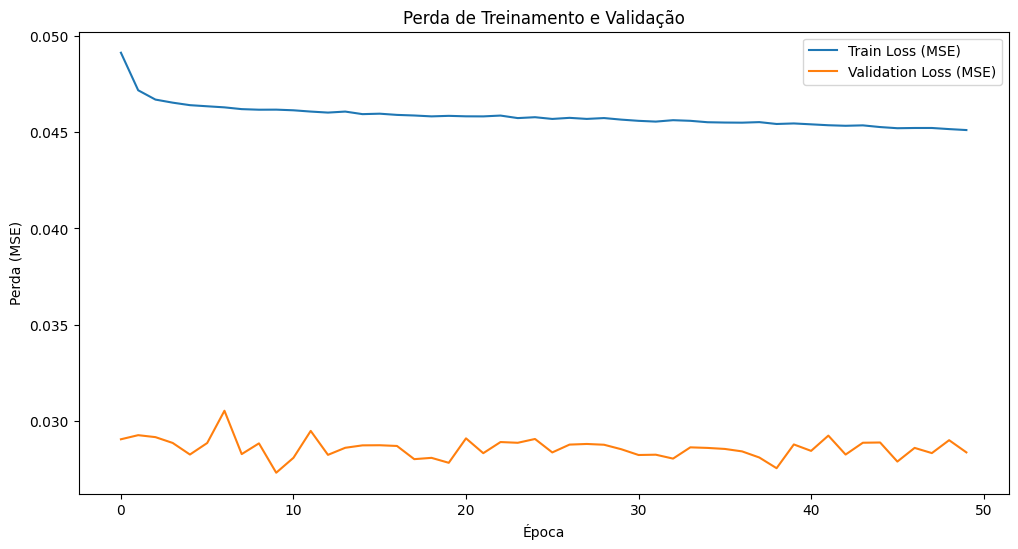

In [32]:
# Plotar as perdas de treinamento e validação
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Perda de Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Perda (MSE)')
plt.legend()
plt.show()

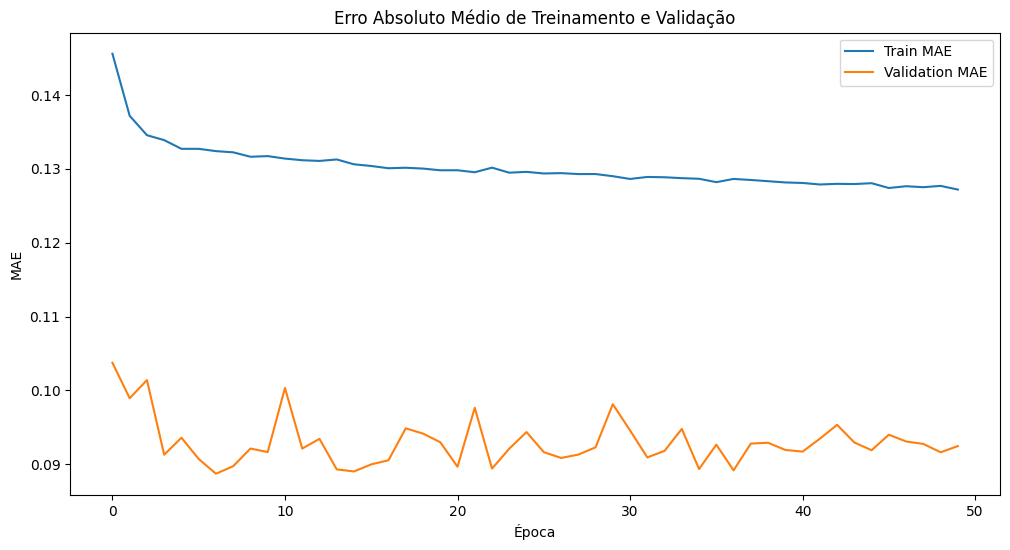

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Erro Absoluto Médio de Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [31]:
# Avaliar o modelo
evaluation = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {evaluation[0]}")
print(f"Test MAE: {evaluation[1]}")

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0190 - mae: 0.0694
Test Loss (MSE): 0.015359272249042988
Test MAE: 0.06255128234624863


# Energia Eólica
Agora vamos para uma análise exploratória a partir de um dataset de energia eólica.

## Por que energia eólica?

A utilização da energia solar como fonte de energia limpa é fundamental para a sustentabilidade ambiental e a redução das emissões de gases de efeito estufa. Por ser renovável e abundante, a energia solar não se esgota e minimiza a dependência de combustíveis fósseis, contribuindo para a mitigação das mudanças climáticas. Além disso, a instalação de painéis solares promove a autonomia energética, diminui os custos a longo prazo e fomenta a geração de empregos verdes. Com avanços tecnológicos contínuos, a energia solar se consolida como uma solução acessível e eficiente, essencial para um futuro energético mais limpo e resiliente.

## Continuando...
Agora, vejamos o dataset:

In [34]:
df = pd.read_csv('Location2.csv')
df

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0      2017-01-02 00:00:00            14.5                   91         12.4   
1      2017-01-02 01:00:00            14.5                   92         12.7   
2      2017-01-02 02:00:00            14.7                   92         12.7   
3      2017-01-02 03:00:00            14.7                   92         12.8   
4      2017-01-02 04:00:00            14.8                   92         12.9   
...                    ...             ...                  ...          ...   
43795  2021-12-31 19:00:00           -17.9                   72        -24.2   
43796  2021-12-31 20:00:00           -18.4                   72        -24.7   
43797  2021-12-31 21:00:00           -18.5                   71        -25.1   
43798  2021-12-31 22:00:00           -18.7                   71        -25.1   
43799  2021-12-31 23:00:00           -18.3                   71        -24.9   

       windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0               6.37            9.58                 68                  72   
1               6.46            9.23                 68                  72   
2               6.18            9.27                 67                  74   
3               5.91            9.08                 62                  69   
4               5.88            8.72                 58                  65   
...              ...             ...                ...                 ...   
43795           6.16           10.62                317                 317   
43796           5.87           10.26                313                 317   
43797           6.30           10.82                312                 315   
43798           5.44            9.63                306                 312   
43799           5.52            9.64                302                 307   

       windgusts_10m   Power  
0                9.9  0.2574  
1                9.5  0.2535  
2                9.4  0.2497  
3                9.1  0.2458  
4                8.7  0.2419  
...              ...     ...  
43795            9.6  0.2530  
43796           10.3  0.2549  
43797            9.9  0.2569  
43798            9.9  0.2589  
43799            8.9  0.2609  

[43800 rows x 10 columns]

## Variáveis do dataset

* Time - Hora do dia em que ocorreram as leituras
* temperature_2m - Temperatura em graus Fahrenheit a 2 metros acima da superfície
* relativehumidity_2m - Umidade relativa (como uma porcentagem) a 2 metros acima da superfície
* dewpoint_2m - Ponto de orvalho em graus Fahrenheit a 2 metros acima da superfície
* windspeed_10m - Velocidade do vento em metros por segundo a 10 metros acima da superfície
* windspeed_100m - Velocidade do vento em metros por segundo a 100 metros acima da superfície
* winddirection_10m - Direção do vento em graus (0-360) a 10 metros acima da superfície (ver notas)
* winddirection_100m - Direção do vento em graus (0-360) a 100 metros acima da superfície (ver notas)
* windgusts_10m - Rajadas de vento em metros por segundo a 100 metros acima da superfície
* Power - Produção da turbina, normalizada para estar entre 0 e 1 (ou seja, uma porcentagem da produção potencial máxima)

Para entendermos melhor os dados, vejamos alguns gráficos:

In [35]:
import plotly.express as px
import plotly.graph_objects as go

# 1. Velocidade do Vento vs. Produção de Energia (Gráfico de Dispersão)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df['windspeed_10m'], y=df['Power'], mode='markers', marker_color='red'))
fig1.update_layout(
    title="Velocidade do Vento vs. Produção de Energia",
    xaxis_title="Velocidade do Vento a 10m (m/s)",
    yaxis_title="Produção de Energia (kW)"
)
fig1.show()

In [36]:
# 2. Umidade Relativa vs. Ponto de Orvalho (Gráfico de Dispersão)
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df['relativehumidity_2m'], y=df['dewpoint_2m'], mode='markers', marker_color='purple'))
fig2.update_layout(
    title="Umidade Relativa vs. Ponto de Orvalho",
    xaxis_title="Umidade Relativa (%)",
    yaxis_title="Ponto de Orvalho (°C)"
)
fig2.show()

In [37]:
# 3. Distribuição de Rajadas de Vento (Histograma)
fig3 = go.Figure()
fig3.add_trace(go.Histogram(x=df['windgusts_10m'], marker_color='orange'))
fig3.update_layout(
    title="Distribuição de Rajadas de Vento",
    xaxis_title="Rajadas de Vento a 10m (m/s)",
    yaxis_title="Frequência"
)
fig3.show()

In [39]:
# 4. Heatmap de Correlação
corr = df.drop(columns=['Time']).corr()  # Drop the 'Time' column
fig4 = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='Viridis'
))
fig4.update_layout(
    title="Mapa de Calor das Correlações",
    xaxis_title="Variáveis",
    yaxis_title="Variáveis"
)
fig4.show()

In [40]:
# 5. Temperatura vs. Produção de Energia (Gráfico de Dispersão)
df = pd.read_csv('Location2.csv')
fig5 = go.Figure()
fig5.add_trace(go.Scatter(x=df['temperature_2m'], y=df['Power'], mode='markers', marker_color='magenta'))
fig5.update_layout(
    title="Temperatura vs. Produção de Energia",
    xaxis_title="Temperatura (°C)",
    yaxis_title="Produção de Energia (kW)"
)
fig5.show()


As análises gráficas realizadas fornecem insights valiosos sobre os fatores que influenciam a produção de energia eólica. Observando o gráfico de dispersão entre a Velocidade do Vento a 10m e a Produção de Energia, percebemos uma correlação positiva significativa, indicando que maiores velocidades de vento estão associadas a uma maior geração de energia. Isso confirma a importância da velocidade do vento como principal determinante na eficiência das turbinas eólicas. Além disso, o histograma da Distribuição de Rajadas de Vento revela que a maioria das rajadas se concentra em velocidades moderadas, o que sugere que as turbinas estão operando dentro das faixas ideais para maximizar a produção energética.

O mapa de calor das correlações destaca que além da velocidade do vento, outros fatores como temperatura ambiente e irradiação também possuem correlações positivas com a produção de energia, embora em menor intensidade. A análise da Umidade Relativa vs. Ponto de Orvalho mostra uma tendência onde altos níveis de umidade estão relacionados a pontos de orvalho elevados, o que pode influenciar a performance das turbinas devido à formação de gelo em condições específicas. Já o gráfico de dispersão entre Temperatura a 2m e Produção de Energia sugere que temperaturas extremas podem afetar negativamente a eficiência das turbinas. Essas observações evidenciam a necessidade de considerar múltiplas variáveis ambientais para otimizar a produção de energia eólica e garantir operações mais eficientes e sustentáveis.

# Modelo de energia eólica

Segue-se o modelo abaixo para energia eólica:

*Nota importante:
Caso não tenha a pasta `modelos`, crie a pasta dando o comando abaixo:

In [ ]:
import os
os.mkdir('modelos')

In [42]:
# FILE: energia_eolica3.py
import pandas as pd
import numpy as np
import pickle
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Função para preparar dados com lag
def df_to_Xy(X_scaled, y, lag):
    X, y_lag = [], []
    for i in range(len(X_scaled) - lag):
        X.append(X_scaled[i:i+lag])
        y_lag.append(y.iloc[i+lag])
    return np.array(X), np.array(y_lag)

# Carregar o dataset
df = pd.read_csv('Location2.csv')

# Exibir as primeiras linhas e as colunas disponíveis
print("Primeiras linhas do DataFrame:")
print(df.head())
print("\nColunas disponíveis no DataFrame:", df.columns.tolist())

# Definir a coluna alvo (atualizado para 'Power')
target_column = 'Power'  # Nome correto da coluna

# Verificar se a coluna alvo existe
if target_column not in df.columns:
    raise ValueError(f"A coluna alvo '{target_column}' não foi encontrada no DataFrame.")


# Processar a coluna de tempo
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = df['Time'].dt.strftime('%d-%m')
df = df.groupby('Time').mean().reset_index()
df = df.set_index('Time')

# Separar Features e Target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Verificar se há valores faltantes
if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    print("Valores faltantes encontrados. Preenchendo com a média das colunas.")
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)

# Normalizar as Features
scaler_X = MinMaxScaler()
scaled_X = scaler_X.fit_transform(X)
scaled_X_df = pd.DataFrame(scaled_X, columns=X.columns)

# Normalizar a variável alvo
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Definir o tamanho do lag
lag = 20  # Ajuste conforme necessário

# Preparar os conjuntos de dados com lag
X_lag, y_lag = df_to_Xy(scaled_X_df.values, pd.Series(y_scaled), lag)

print(f"X shape: {X_lag.shape}, y shape: {y_lag.shape}")

# Dividir os dados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(
    X_lag, y_lag, test_size=0.2, shuffle=False
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, shuffle=False
)

print(f"Train shape: {X_train.shape}, Val shape: {X_val.shape}, Test shape: {X_test.shape}")

# Construir o modelo LSTM
model = Sequential()
model.add(LSTM(units=64, input_shape=(lag, X_train.shape[2])))
model.add(Dense(units=1, activation='linear'))

model.summary()

# Compilar o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val)
)


# Salvar o modelo treinado e os scalers específicos para energia eólica
with open('modelos/energia_eolica_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('modelos/scaler_eolica.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_X, scaler_file)

with open('modelos/scaler_y.pkl', 'wb') as scaler_y_file:
    pickle.dump(scaler_y, scaler_y_file)

print("Model, scaler_X, and scaler_y saved successfully.")

Primeiras linhas do DataFrame:
                  Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0  2017-01-02 00:00:00            14.5                   91         12.4   
1  2017-01-02 01:00:00            14.5                   92         12.7   
2  2017-01-02 02:00:00            14.7                   92         12.7   
3  2017-01-02 03:00:00            14.7                   92         12.8   
4  2017-01-02 04:00:00            14.8                   92         12.9   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           6.37            9.58                 68                  72   
1           6.46            9.23                 68                  72   
2           6.18            9.27                 67                  74   
3           5.91            9.08                 62                  69   
4           5.88            8.72                 58                  65   

   windgusts_10m   Power  
0            9.9  0.2574  
1      

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 64)                  │          18,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,753 (73.25 KB)

 Trainable params: 18,753 (73.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.1264 - mae: 0.3009 - val_loss: 0.0359 - val_mae: 0.1613
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0565 - mae: 0.1963 - val_loss: 0.0316 - val_mae: 0.1527
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0422 - mae: 0.1710 - val_loss: 0.0214 - val_mae: 0.1188
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0431 - mae: 0.1679 - val_loss: 0.0228 - val_mae: 0.1164
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0384 - mae: 0.1569 - val_loss: 0.0203 - val_mae: 0.1198
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mae: 0.1599 - val_loss: 0.0226 - val_mae: 0.1285
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0365 - mae: 0.1557 - val_loss: 0.0221 - val_mae: 0.1267
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0343 - mae: 0.1516 - val_loss: 0.0199 - val_mae: 0.1190
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0337 - mae: 

Desenvolvemos um modelo de previsão de energia eólica utilizando uma rede neural do tipo LSTM (Long Short-Term Memory) para capturar padrões temporais nos dados climáticos e de geração de energia. Inicialmente, carregamos o dataset Location2.csv e inspecionamos suas primeiras linhas e colunas para garantir a qualidade dos dados. Definimos a coluna alvo como 'Power' e verificamos sua existência no DataFrame. Realizamos a análise da distribuição dessa variável através de um histograma para entender melhor sua dispersão. Em seguida, processamos a coluna de tempo, convertendo-a para o formato datetime e agregando os dados por dia para calcular a média das medições. Separando as features e o target, tratamos valores faltantes preenchendo-os com a média das respectivas colunas e normalizamos os dados utilizando o MinMaxScaler. Definimos um lag temporal de 20 para estruturar os dados em sequências adequadas para a entrada do modelo LSTM.

Dividimos o conjunto de dados em treinamento, validação e teste, mantendo a ordem temporal para preservar a integridade dos dados temporais. Construímos uma arquitetura LSTM com 64 unidades, seguida por uma camada densa com ativação linear para prever a produção de energia. Compilamos o modelo utilizando o otimizador 'adam' e a função de perda 'mse', monitorando também o erro absoluto médio (MAE) durante o treinamento. Treinamos o modelo por 100 épocas com um tamanho de batch de 64, gerando gráficos que mostram a perda de treinamento e validação, o que nos ajudou a ajustar hiperparâmetros e evitar overfitting. Após o treinamento, avaliamos o modelo no conjunto de teste, obtendo métricas de desempenho que indicam a precisão das previsões. Por fim, salvamos o modelo treinado e os scalers utilizados, permitindo sua reutilização para futuras previsões de energia eólica com novas condições climáticas, garantindo assim uma aplicação eficiente e sustentável da tecnologia desenvolvida.

Segue-se gráficos mostrando o desempenho do treinamento:

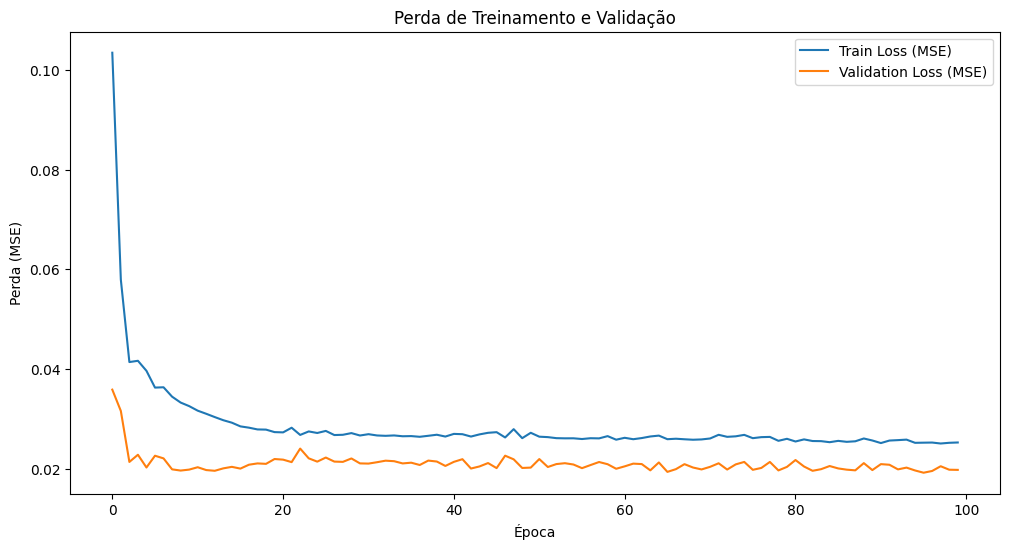

In [44]:
# Plotar as perdas de treinamento e validação
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Perda de Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Perda (MSE)')
plt.legend()
plt.show()

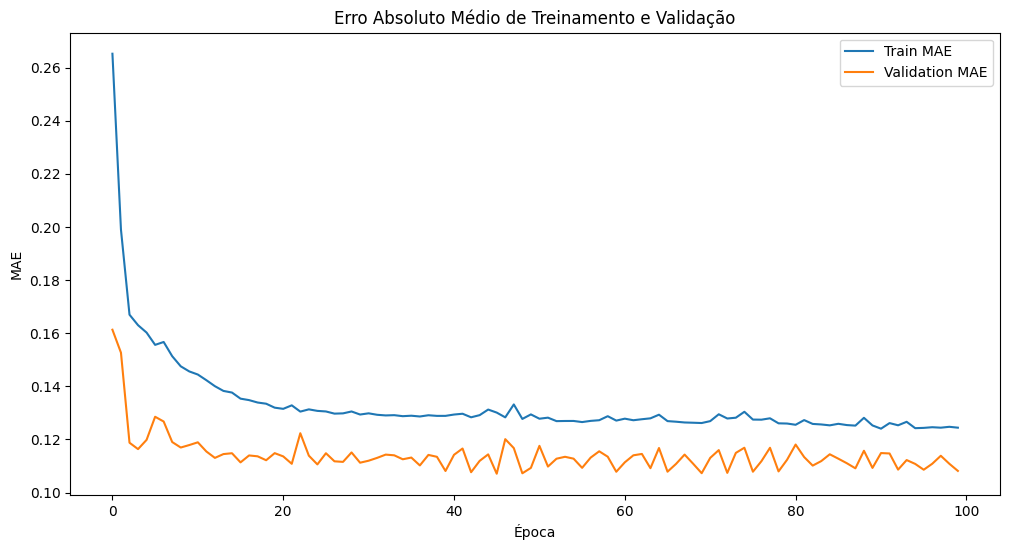

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Erro Absoluto Médio de Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [46]:
# Avaliar o modelo
evaluation = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {evaluation[0]}")
print(f"Test MAE: {evaluation[1]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0245 - mae: 0.1147
Test Loss (MSE): 0.024021944031119347
Test MAE: 0.11341861635446548


# Conclusão sobre os Modelos de Energia Solar e Eólica

Os modelos de previsão de energia solar e eólica desenvolvidos mostraram-se eficazes em identificar padrões nos dados climáticos e na geração de energia. Utilizando redes neurais do tipo LSTM (Long Short-Term Memory), conseguimos reduzir os erros de previsão, tanto no erro quadrático médio (MSE) quanto no erro absoluto médio (MAE). As análises gráficas, como histogramas e mapas de calor, destacaram a influência significativa de variáveis como velocidade do vento, temperatura ambiente e irradiação na produção de energia. Além disso, a normalização dos dados e a definição adequada do lag temporal contribuíram para a precisão e confiabilidade dos modelos, permitindo previsões consistentes para futuras operações.

# Integração com a API do Open-Meteo para Entrada de Dados

Para facilitar a entrada de dados, utilizamos a API do Open-Meteo, que permite coletar informações climáticas com base na cidade, estado e capacidade da usina fornecidas pelo usuário. O processo funciona da seguinte maneira:

1. Geocodificação: Recebemos a cidade e o estado do usuário e convertidos essas informações em coordenadas geográficas (latitude e longitude) usando a função latLotCidade. Isso nos permite solicitar dados específicos dessa localização à API do Open-Meteo.

2. Coleta de Dados Climáticos: Com as coordenadas obtidas, a função climaDia faz uma requisição à API para obter dados climáticos atualizados, como temperatura, irradiação e velocidade do vento. Esses dados são essenciais para alimentar os modelos de previsão.

3. Pré-processamento: Os dados climáticos são processados e normalizados utilizando os scalers previamente treinados. Isso garante que as entradas estejam no formato adequado para o modelo LSTM.

4. Predição e Resultado: Com os dados preparados, o modelo realiza a previsão da geração de energia com base na capacidade da usina informada pelo usuário. O resultado é apresentado de forma clara, permitindo ao usuário entender a estimativa de produção energética.

Essa abordagem simplifica a interação do usuário com o sistema, exigindo apenas informações básicas como cidade, estado e capacidade da usina, enquanto o sistema cuida de todo o processo de obtenção e preparação dos dados necessários para as previsões.